# Problem 2
For a Beta() distribution, calculated the MAP (Maximum a posteriori) estimation and the following is just a simple implementation to experiment some cases and verify the result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def p_hat_estimator(n, r, alpha, beta):
    return (alpha + r - 1) / (n + alpha + beta - 2)

In [3]:
def plot_beta_dist(n, r, alpha_vector, beta_vector):
    x = np.linspace(0, 1, 1000)

    fig, axes = plt.subplots(len(alpha_vector)//3, 3, figsize=(24, 8), sharey=True)

    for idx in range(len(alpha_vector)):

        alpha = alpha_vector[idx]
        beta = beta_vector[idx]
        ax = axes[idx//3, idx % 3]


        y = scipy.stats.beta.pdf(x, alpha, beta)


        ax.plot(x, y, 'b-', lw=2, label=f'Beta({alpha}, {beta})')
        p_hat = p_hat_estimator(n, r, alpha, beta)
        p_mle = r / n
        ax.axvline(p_hat, color='g', label='MAP p = {:.5f}'.format(p_hat))
        ax.axvline(p_mle, color='r', label='MLE p = {:.5f}'.format(p_mle))



        ax.set_xlabel('x')
        ax.set_ylabel('Probability Density')
        ax.legend()
    plt.show()

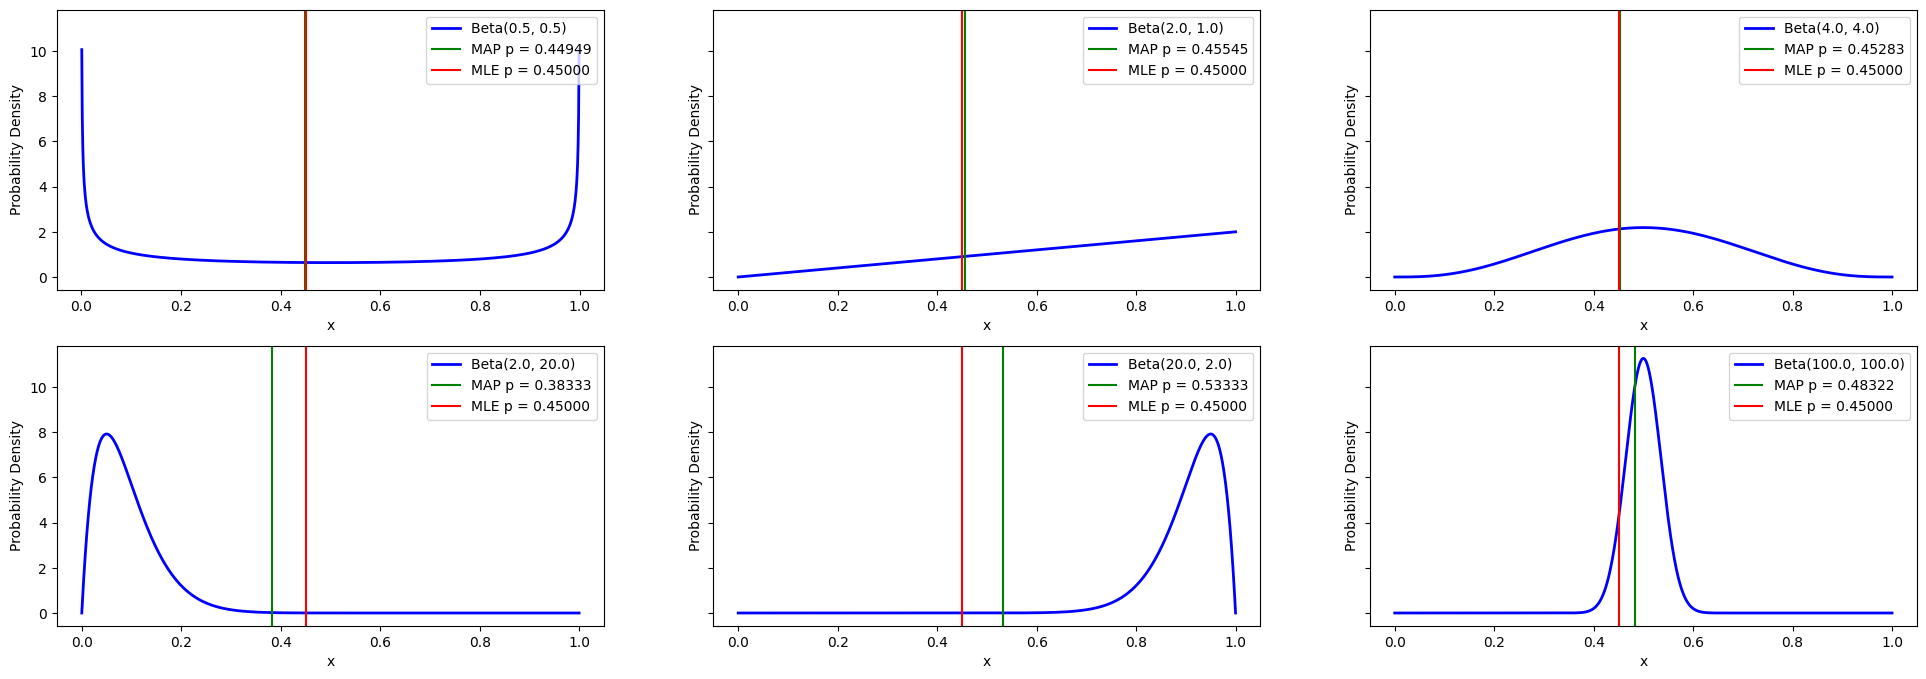

In [4]:
n = 100
r = 45
alpha = np.array([0.5, 2, 4, 2, 20, 100])
beta  = np.array([0.5, 1, 4, 20, 2, 100])


plot_beta_dist(n, r, alpha, beta)

# Problem 7

In [5]:
import numpy as np
from scipy.linalg import qr
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [6]:
n = 2000

X = np.eye((n))

y = np.arange(-n/2, n/2)

beta = X.T @ y

## Best Subset Selection

In [7]:
# Best subset selection
def get_best_subset(M):
    mth_largest = beta[np.argpartition(np.abs(beta), -M)[-M]]
    return np.where(abs(beta)<abs(mth_largest), 0, beta)

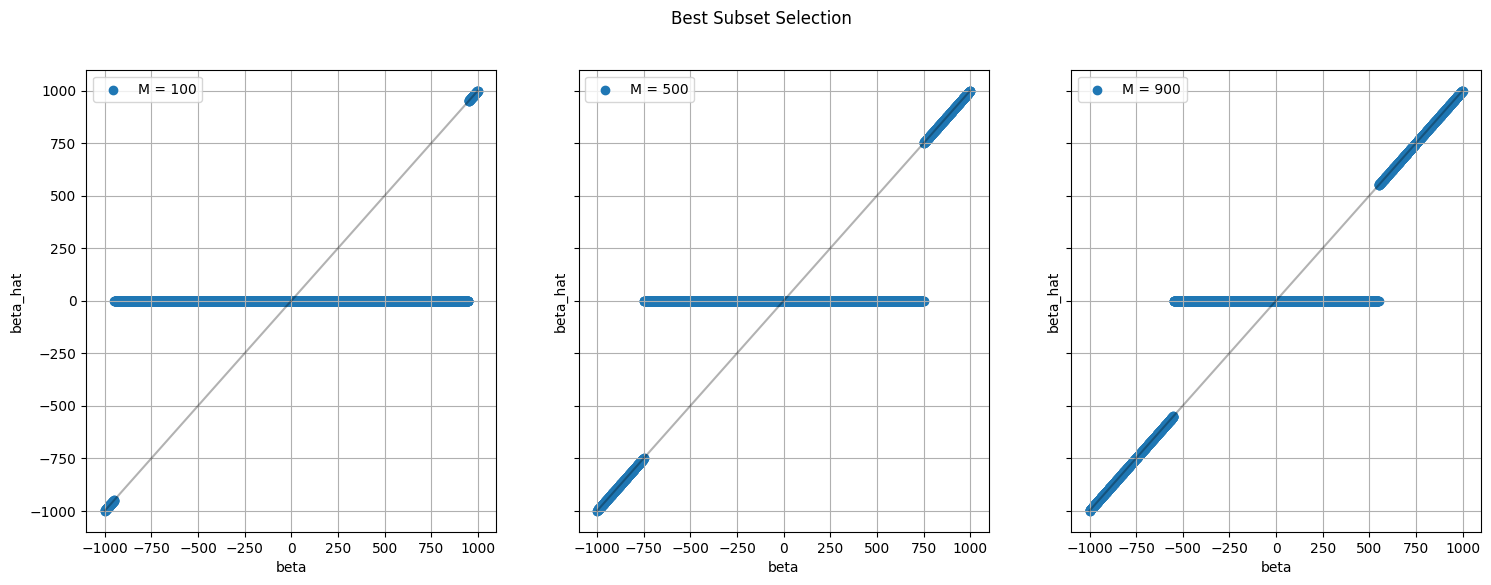

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("Best Subset Selection")
M = [100, 500, 900]

for i, m in enumerate(M):
    axes[i].plot(beta, beta, c='k', alpha=0.3)
    axes[i].scatter(beta, get_best_subset(M[i]), label="M = {}".format(M[i]), c=f"C0")

    axes[i].set_xlabel("beta")
    axes[i].set_ylabel("beta_hat")
    axes[i].legend()
    axes[i].grid()

## Ridge Regression

In [9]:
# Ridge regression
def get_ridge_coeff(alpha):
    ridge = Ridge(alpha = alpha, solver='lsqr')
    ridge.fit(X, y)
    return sorted(ridge.coef_)

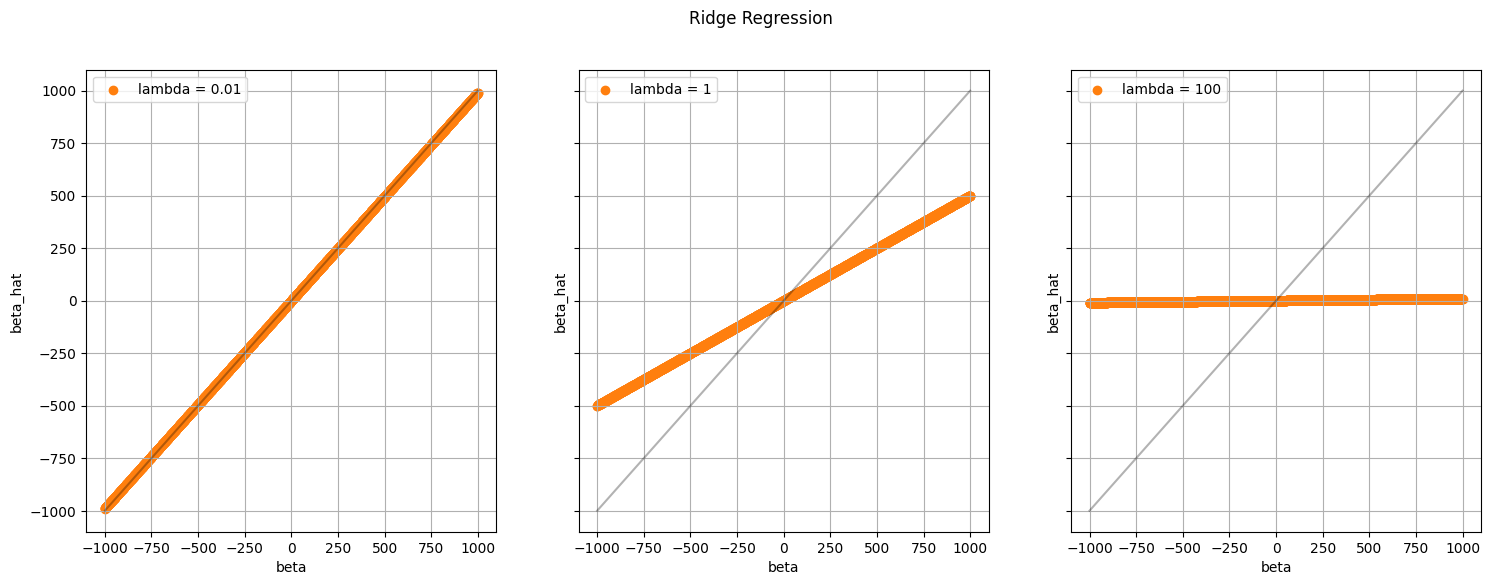

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("Ridge Regression")
lambdas = [1/100, 1, 100]

for i, m in enumerate(M):
    axes[i].plot(beta, beta, c='k', alpha=0.3)
    axes[i].scatter(beta, get_ridge_coeff(lambdas[i]), label="lambda = {}".format(lambdas[i]), c=f"C1")

    axes[i].set_xlabel("beta")
    axes[i].set_ylabel("beta_hat")
    axes[i].legend()
    axes[i].grid()

## Lasso Regression

In [11]:
# Lasso regression
def get_lasso_coeff(alpha):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X, y)
    return sorted(lasso.coef_)

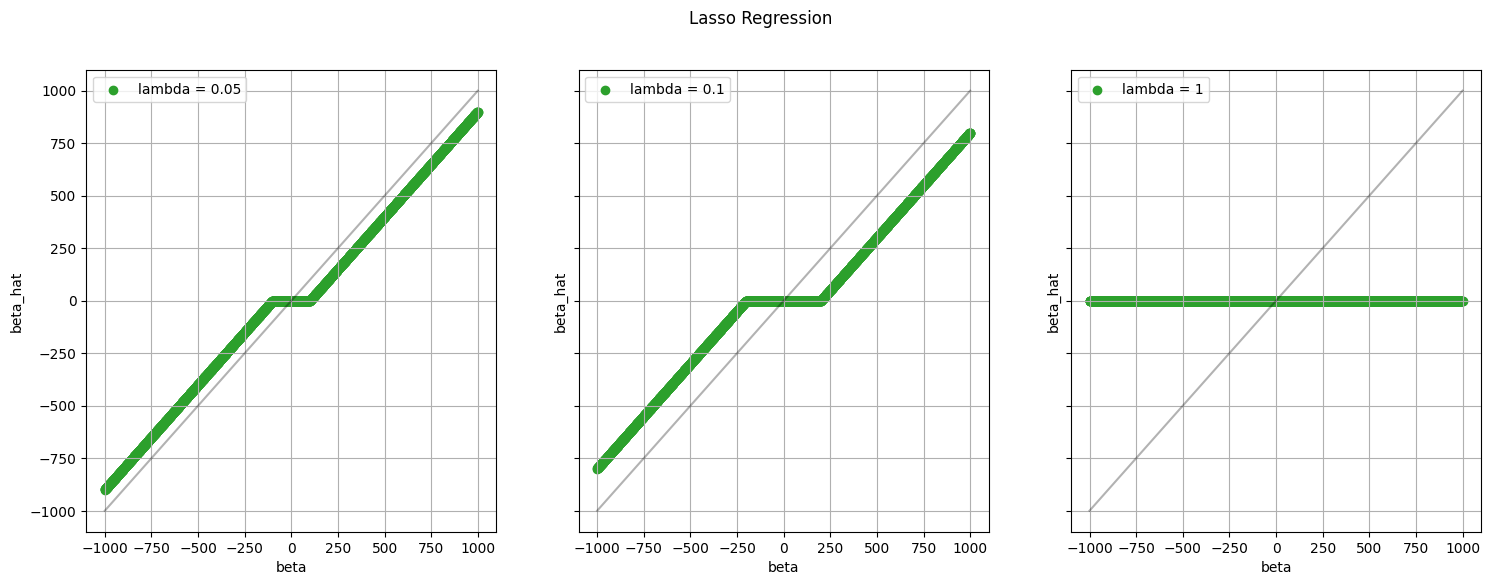

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("Lasso Regression")
lambdas = [5/100, 1/10, 1]

for i, m in enumerate(M):
    axes[i].plot(beta, beta, c='k', alpha=0.3)
    axes[i].scatter(beta, get_lasso_coeff(lambdas[i]), label="lambda = {}".format(lambdas[i]), c=f"C2")

    axes[i].set_xlabel("beta")
    axes[i].set_ylabel("beta_hat")
    axes[i].legend()
    axes[i].grid()

## Elastic Net

In [13]:
# Elastic Net
def get_elastic_net_coeff(alpha, l1_ratio):
    en = ElasticNet(alpha = alpha, l1_ratio=l1_ratio)
    en.fit(X, y)
    return sorted(en.coef_)

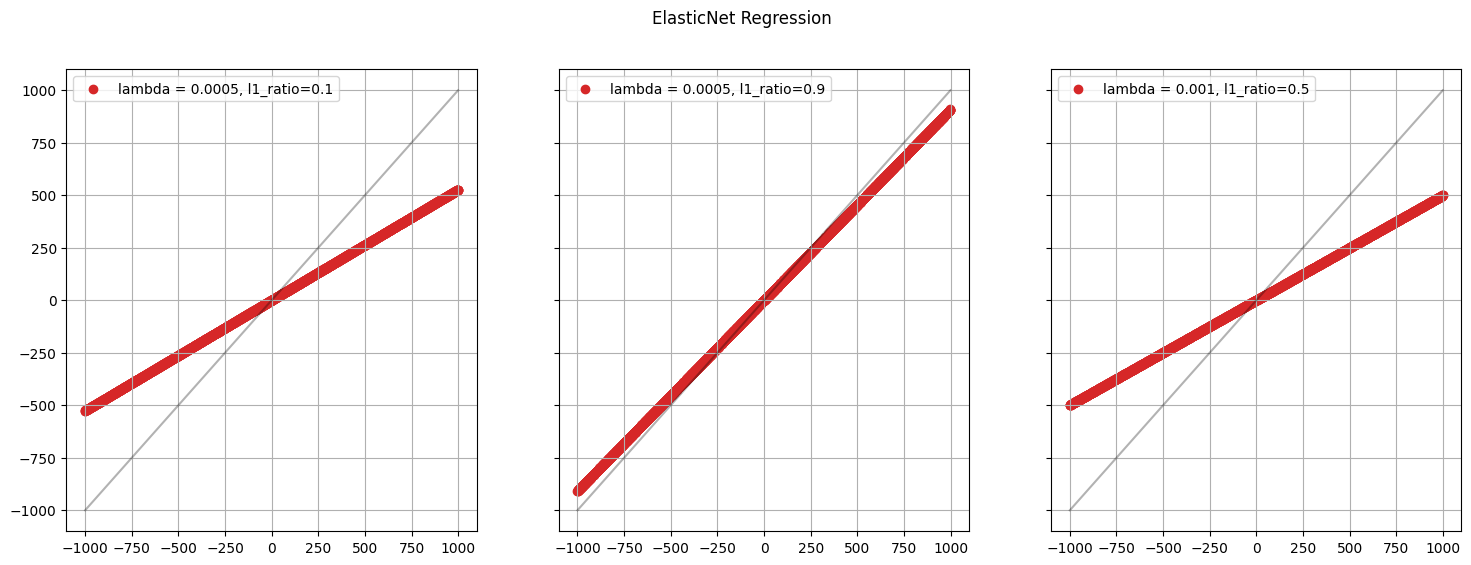

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("ElasticNet Regression")
lambdas = [5e-4, 5e-4, 1e-3]
l1_ratio = [0.1, 0.9, 0.5]

for i, m in enumerate(M):
    axes[i].plot(beta, beta, c='k', alpha=0.3)
    axes[i].scatter(beta, get_elastic_net_coeff(lambdas[i], l1_ratio[i]), label="lambda = {}, l1_ratio={}".format(lambdas[i], l1_ratio[i]), c=f"C3")
    axes[i].legend()
    axes[i].grid()

#Problem 8



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

We first initialize and instance of the problem that is described in the question text.

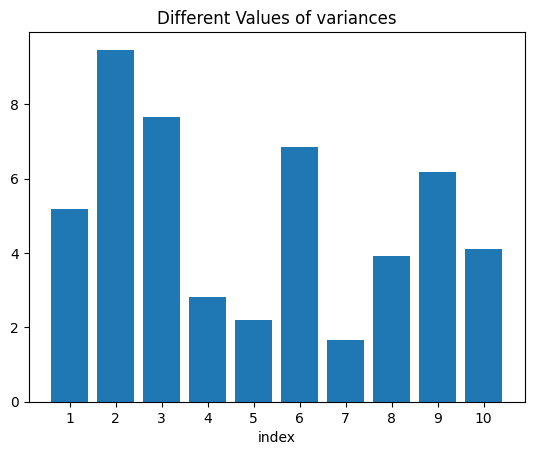

In [16]:
np.random.seed(23)
n = 10
true_mean = 5
variance_vector = np.random.rand(n) * 10

plt.bar(range(1, n+1), variance_vector)
plt.xticks(range(1, n+1))
plt.xlabel("index")
plt.title("Different Values of variances")
plt.show()

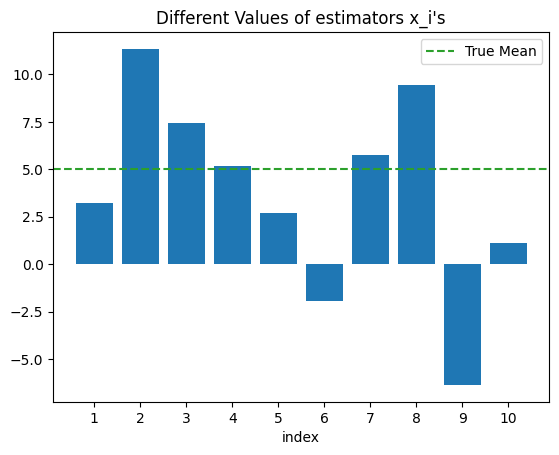

In [17]:
X = [ np.random.normal(true_mean, sigma_i) for sigma_i in variance_vector]

plt.bar(range(1, n+1), X)
plt.axhline(true_mean, linestyle="--", c="C2", label="True Mean")
plt.xticks(range(1, n+1))
plt.xlabel("index")
plt.title("Different Values of estimators x_i's")
plt.legend()
plt.show()

## Part b

In [18]:
def neg_log_likelihood(params, X):
    mu = params[0]
    sigma2 = params[1:]
    n = len(X)

    log_likelihood = np.sum([-np.log(sigma_i) + (-(x_i - mu)**2)/sigma_i**2 for x_i, sigma_i in zip(X, sigma2)])
    return - log_likelihood


initial_guess = [np.random.rand()*10] + [np.random.rand()*10] * n
bounds = [(-float('inf'), float('inf'))] + [(1e-4, None)] * n

result = minimize(lambda params: neg_log_likelihood(params, X), initial_guess, bounds=bounds)

optimal_params = result.x
mu_optimal = optimal_params[0]
variance_optimal = optimal_params[1:]

print("Optimal mu:", mu_optimal)
print("Optimal variances:", variance_optimal)

Optimal mu: 5.170405938658621
Optimal variances: [2.82687518e+00 8.99702577e+00 3.25239930e+00 1.00000000e-04
 3.46433625e+00 1.01224213e+01 8.18087323e-01 5.84063917e+00
 1.51557241e+01 5.71472090e+00]


## Part c

In [19]:
a = 1
b = 2

def log_a_posteriori(params, X):
    mu = params[0]
    sigma2 = params[1:]
    n = len(X)
    log_a_posteriori = np.sum([ a*np.log(lambda_i) -lambda_i*(x_i-mu)**2 - b*lambda_i for x_i, lambda_i in zip(X, 1/sigma2)])

    return - log_a_posteriori


initial_guess = [np.random.rand()*10] + [np.random.rand()*10] * n
bounds = [(-float('inf'), float('inf'))] + [(1e-4, None)] * n

result = minimize(lambda params: log_a_posteriori(params, X), initial_guess, bounds=bounds)

optimal_params = result.x
mu_optimal = optimal_params[0]
sigma_optimal = optimal_params[1:]

print("Optimal mu:", mu_optimal)
print("Optimal sigma_i's:", sigma_optimal)

Optimal mu: 4.757437060185224
Optimal sigma_i's: [  4.41728879  45.38274541   9.34433713   2.16984348   6.25955939
  46.74538923   2.9628244   23.82688556 125.65446899  15.13571531]


# Problem 9

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm

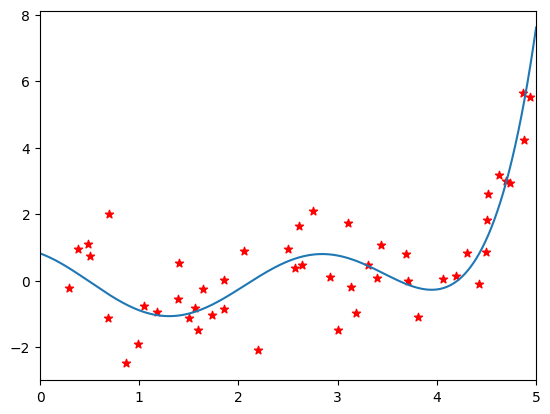

In [21]:
np.random.seed(42)
n = 1000
n_samples = 50


x_range = np.linspace(0, 5, n)
f_x = (np.exp(2*x_range)*0.5 - 1000*np.sin(2*x_range-1) - np.exp(x_range+3))/1000

random_indices = np.sort(np.random.choice(range(n), n_samples, replace=False))
x = x_range[random_indices]
y = f_x[random_indices] + np.random.normal(0, 1, n_samples)

plt.xlim([0, 5])
plt.plot(x_range, f_x)
plt.scatter(x_range[random_indices], y, marker='*', c='r')
plt.show()

## Part a

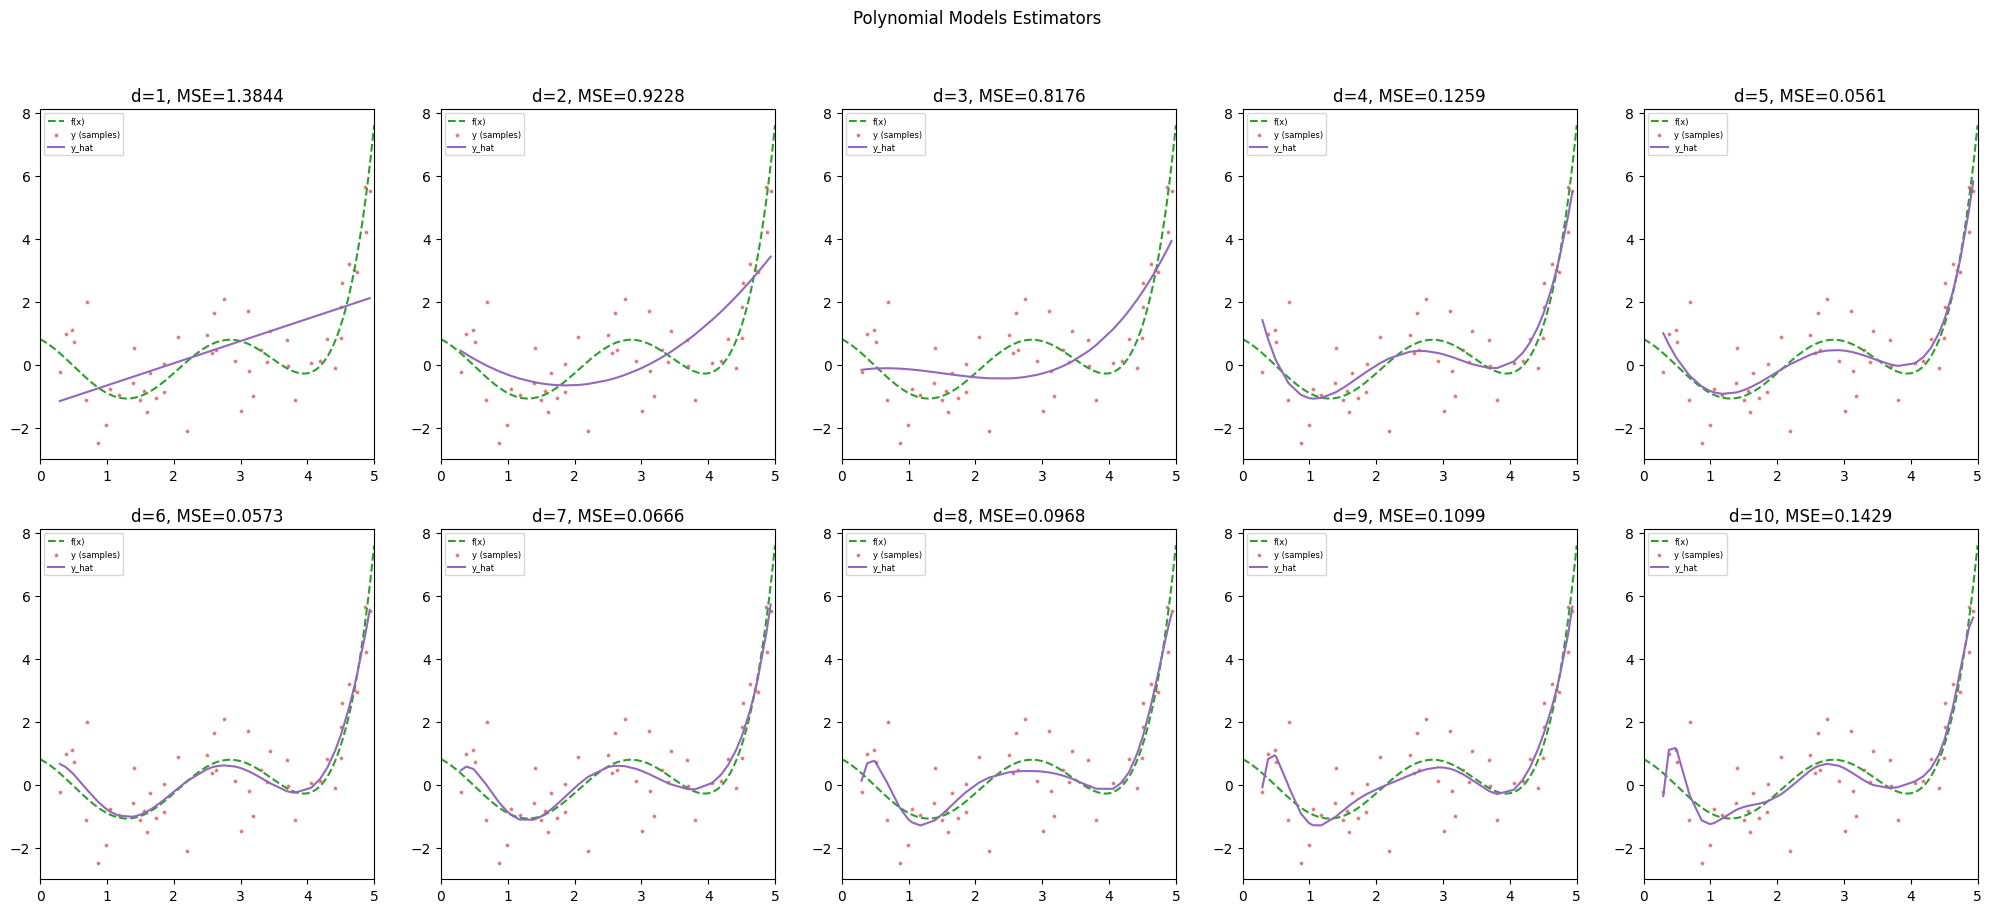

In [22]:
def poly_d(x, *params):
    d = len(params)
    y_hat = 0

    for i in range(d):
        y_hat += params[i]*(x**i)

    return y_hat

def get_poly_y_hat(d, x, y, precession=4):
    p0 = np.random.rand(d + 1)

    res, _ = curve_fit(poly_d, x, y, p0=p0)
    y_hat = poly_d(x, *res)
    mse = np.mean((y_hat-f_x[random_indices])**2)
    return poly_d(x, *res), np.round(mse, precession)


fig, axes = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle("Polynomial Models Estimators")


for d in range(1, 11):
    ax = axes[(d-1)//5][(d-1)%5]
    y_hat, mse = get_poly_y_hat(d, x, y)

    ax.set_xlim([0, 5])

    ax.plot(x_range, f_x, '--', c='C2', label="f(x)")
    ax.scatter(x, y, alpha=0.5, s=5, marker='*', c='C3', label="y (samples)")
    ax.plot(x, y_hat, c='C4', label="y_hat")
    ax.set_title(f'd={d}, MSE={mse}')


    ax.legend(loc=2, prop={'size': 6})
plt.show()


## Part b

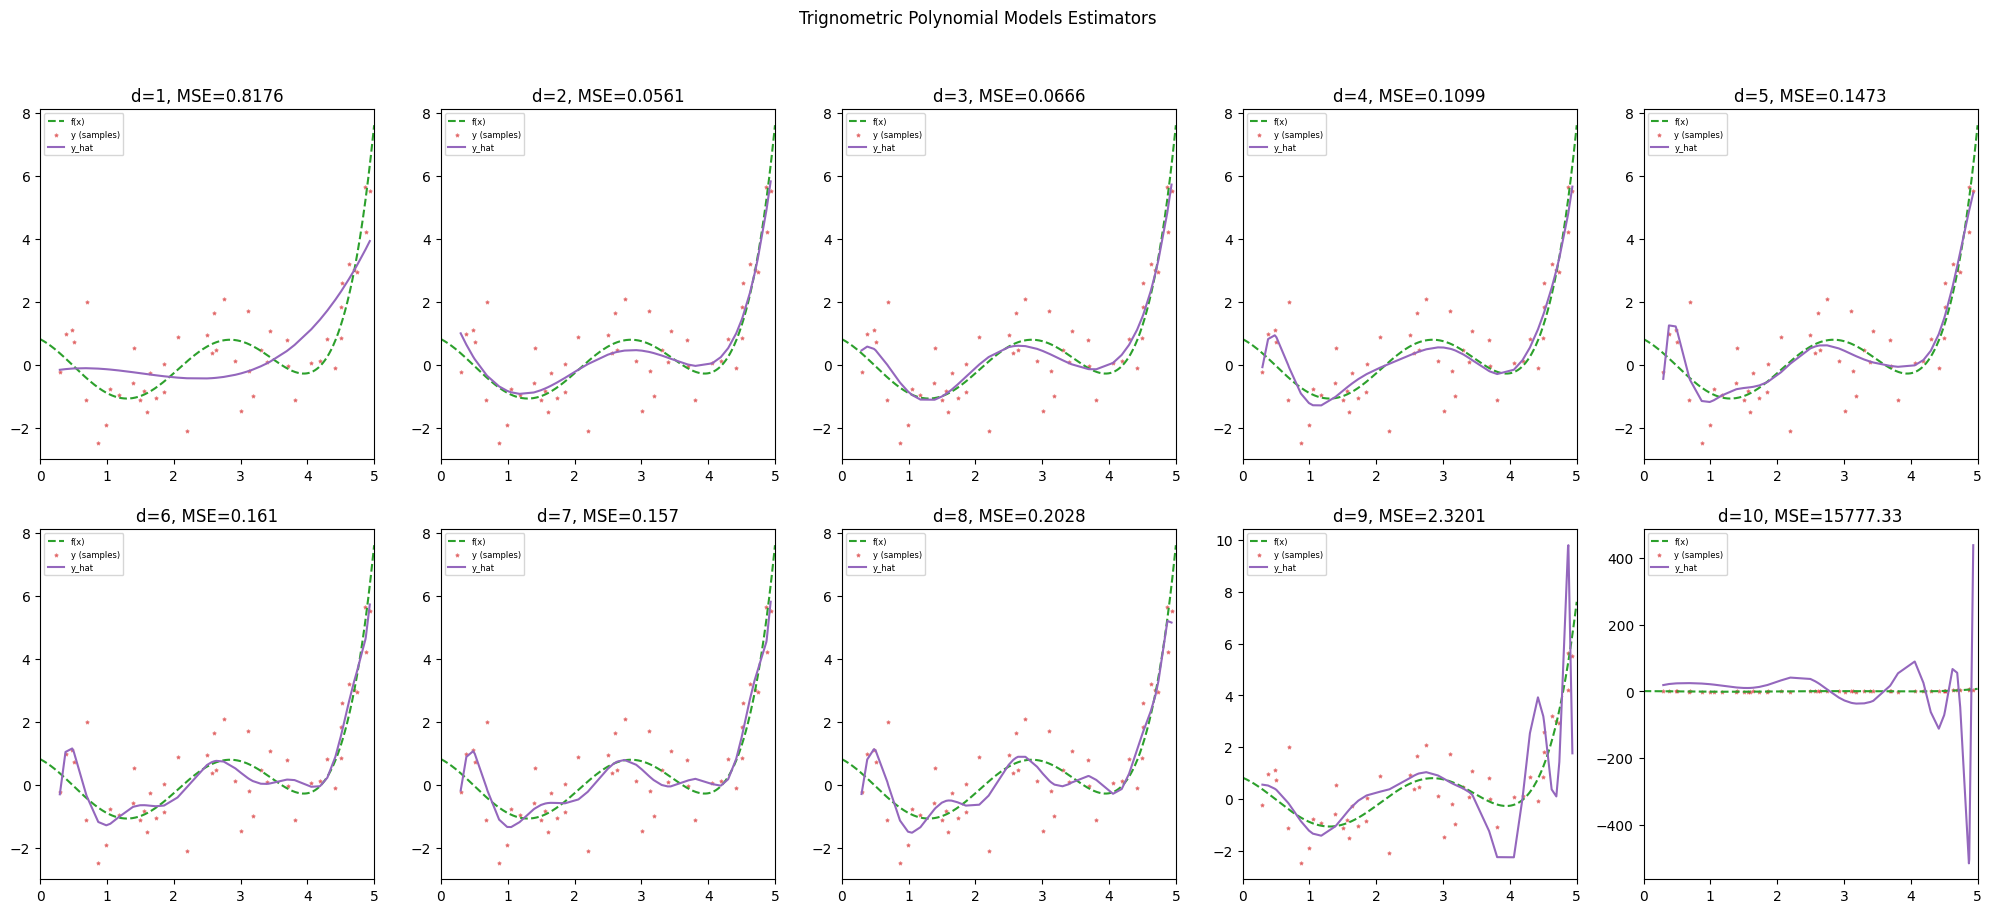

In [23]:
def trig_poly_d(x, *params):
    d = len(params)
    y_hat = 0

    for i in range(d):
        y_hat += params[i]*(np.sin(x*i)) + params[i+d]*np.cos(x*i)

    return y_hat

def get_trig_poly_y_hat(d, x, y, precession = 4):
    p0 = np.random.rand(2*(d + 1))

    res, _ = curve_fit(poly_d, x, y, p0=p0)
    y_hat = poly_d(x, *res)
    mse = np.mean((y_hat-f_x[random_indices])**2)
    return poly_d(x, *res), np.round(mse, precession)


fig, axes = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle("Trignometric Polynomial Models Estimators")


for d in range(1, 11):
    ax = axes[(d-1)//5][(d-1)%5]
    y_hat, mse = get_trig_poly_y_hat(d, x, y)

    ax.set_xlim([0, 5])

    ax.plot(x_range, f_x, '--', c='C2', label="f(x)")
    ax.scatter(x, y, alpha=0.5, s=5, marker='*', c='C3', label="y (samples)")
    ax.plot(x, y_hat, c='C4', label="y_hat")
    ax.set_title(f'd={d}, MSE={mse}')


    ax.legend(loc=2, prop={'size': 6})
plt.show()


## Part c

In [24]:
n_iterations = 10000
n_degrees = 10
errors = np.zeros((n_degrees, n_iterations))

for d in (range(n_degrees)):
    print(f'd={d}')
    for i in tqdm(range(n_iterations)):
        y_hat, mse = get_poly_y_hat(d, x, y, precession=10)

        errors[d][i] = np.max(y_hat - f_x[random_indices])

poly_expected_inf_norm = np.mean(errors, axis=1)

d=0


100%|██████████| 10000/10000 [00:07<00:00, 1306.88it/s]


d=1


100%|██████████| 10000/10000 [00:13<00:00, 764.25it/s]


d=2


100%|██████████| 10000/10000 [00:15<00:00, 662.40it/s]


d=3


100%|██████████| 10000/10000 [00:19<00:00, 524.83it/s]


d=4


100%|██████████| 10000/10000 [00:13<00:00, 717.94it/s]


d=5


100%|██████████| 10000/10000 [00:12<00:00, 816.85it/s]


d=6


100%|██████████| 10000/10000 [00:19<00:00, 518.30it/s]


d=7


100%|██████████| 10000/10000 [00:22<00:00, 439.59it/s]


d=8


100%|██████████| 10000/10000 [00:39<00:00, 252.43it/s]


d=9


100%|██████████| 10000/10000 [01:03<00:00, 157.65it/s]


In [25]:
n_iterations = 10000
n_degrees = 10
errors = np.zeros((n_degrees, n_iterations))

for d in (range(n_degrees)):
    print(f'd={d}')
    for i in tqdm(range(n_iterations)):
        y_hat, mse = get_trig_poly_y_hat(d, x, y, precession=10)

        errors[d][i] = np.max(y_hat - f_x[random_indices])

trig_poly_expected_inf_norm = np.mean(errors, axis=1)

d=0


100%|██████████| 10000/10000 [00:04<00:00, 2219.80it/s]


d=1


100%|██████████| 10000/10000 [00:08<00:00, 1232.09it/s]


d=2


100%|██████████| 10000/10000 [00:13<00:00, 767.01it/s]


d=3


100%|██████████| 10000/10000 [00:22<00:00, 443.25it/s]


d=4


100%|██████████| 10000/10000 [01:05<00:00, 152.70it/s]


d=5


100%|██████████| 10000/10000 [02:34<00:00, 64.58it/s]


d=6


100%|██████████| 10000/10000 [03:34<00:00, 46.53it/s]


d=7


100%|██████████| 10000/10000 [04:15<00:00, 39.08it/s]


d=8


100%|██████████| 10000/10000 [04:55<00:00, 33.85it/s]


d=9


100%|██████████| 10000/10000 [05:43<00:00, 29.11it/s]


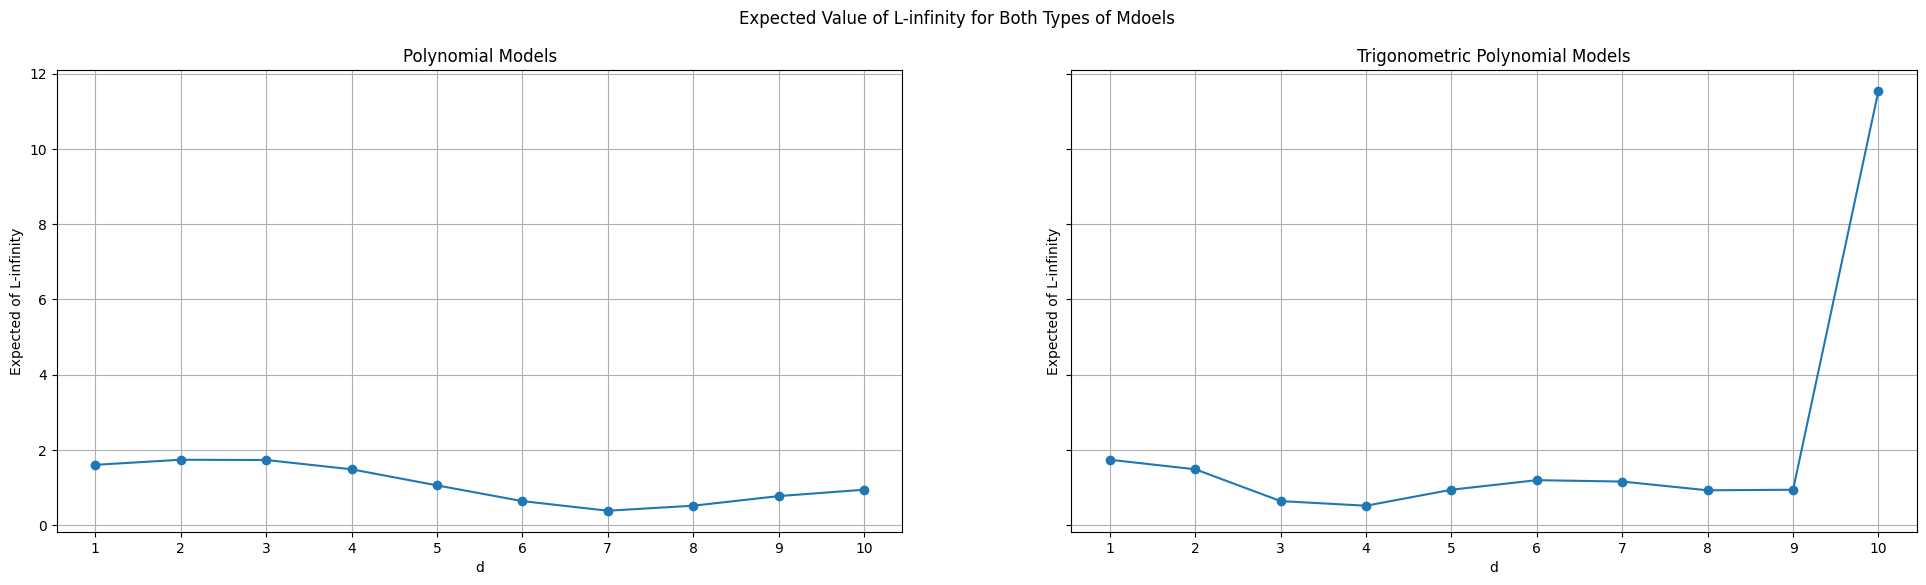

In [26]:
fig, axes = plt.subplots(1, 2 , sharey=True, figsize=(24, 6))
fig.suptitle("Expected Value of L-infinity for Both Types of Mdoels")

axes[0].plot(range(1, n_degrees+1), poly_expected_inf_norm, marker='o')
axes[0].set_xticks(range(1, n_degrees+1))
axes[0].set_xlabel("d")
axes[0].set_ylabel("Expected of L-infinity")
axes[0].set_title("Polynomial Models")
axes[0].grid()


axes[1].plot(range(1, n_degrees+1), trig_poly_expected_inf_norm, marker='o')
axes[1].set_xticks(range(1, n_degrees+1))
axes[1].set_xlabel("d")
axes[1].set_ylabel("Expected of L-infinity")
axes[1].set_title("Trigonometric Polynomial Models")
axes[1].grid()
plt.show()

# Problem 10

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest

In [28]:
! gdown 137xDwZ7Q00RD8YhKvpC6QHQPpiZrj1Tw

Downloading...
From: https://drive.google.com/uc?id=137xDwZ7Q00RD8YhKvpC6QHQPpiZrj1Tw
To: /content/deep-learning-flights.csv
100% 5.36M/5.36M [00:00<00:00, 196MB/s]


## Explore Dataset


In [29]:
df_flights = pd.read_csv("/content/deep-learning-flights.csv", index_col=0)

df_flights.head()

,DAY,MONTH,YEAR,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIRLINE_DELAY
5392343,4,12,2015,5,WN,LGA,ATL,950,954.0,4.0,...,1012.0,170.0,145.0,119.0,762,1211.0,8.0,1240,1219.0,0.0
5569155,15,12,2015,2,AA,CLT,BOS,2020,2013.0,-7.0,...,2032.0,125.0,118.0,95.0,728,2207.0,4.0,2225,2211.0,0.0
5397710,4,12,2015,5,UA,IAD,LAX,1514,1507.0,-7.0,...,1518.0,353.0,323.0,305.0,2288,1723.0,7.0,1807,1730.0,0.0
5448631,8,12,2015,2,AA,LAX,AUS,635,628.0,-7.0,...,643.0,178.0,167.0,148.0,1242,1111.0,4.0,1133,1115.0,0.0
5548657,14,12,2015,1,WN,FLL,PIT,1515,1524.0,9.0,...,1538.0,160.0,143.0,123.0,994,1741.0,6.0,1755,1747.0,0.0


In [30]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 5392343 to 5740680
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DAY                  50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   YEAR                 50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   ORIGIN_AIRPORT       50000 non-null  object 
 6   DESTINATION_AIRPORT  50000 non-null  object 
 7   SCHEDULED_DEPARTURE  50000 non-null  int64  
 8   DEPARTURE_TIME       50000 non-null  float64
 9   DEPARTURE_DELAY      50000 non-null  float64
 10  TAXI_OUT             50000 non-null  float64
 11  WHEELS_OFF           50000 non-null  float64
 12  SCHEDULED_TIME       50000 non-null  float64
 13  ELAPSED_TIME         50000 non-null  float64
 14  AIR_TIME             50000 non-null  float64
 15  DISTANCE             50000 n

There is not any empty cells, so we can get right into the correlation between columns.

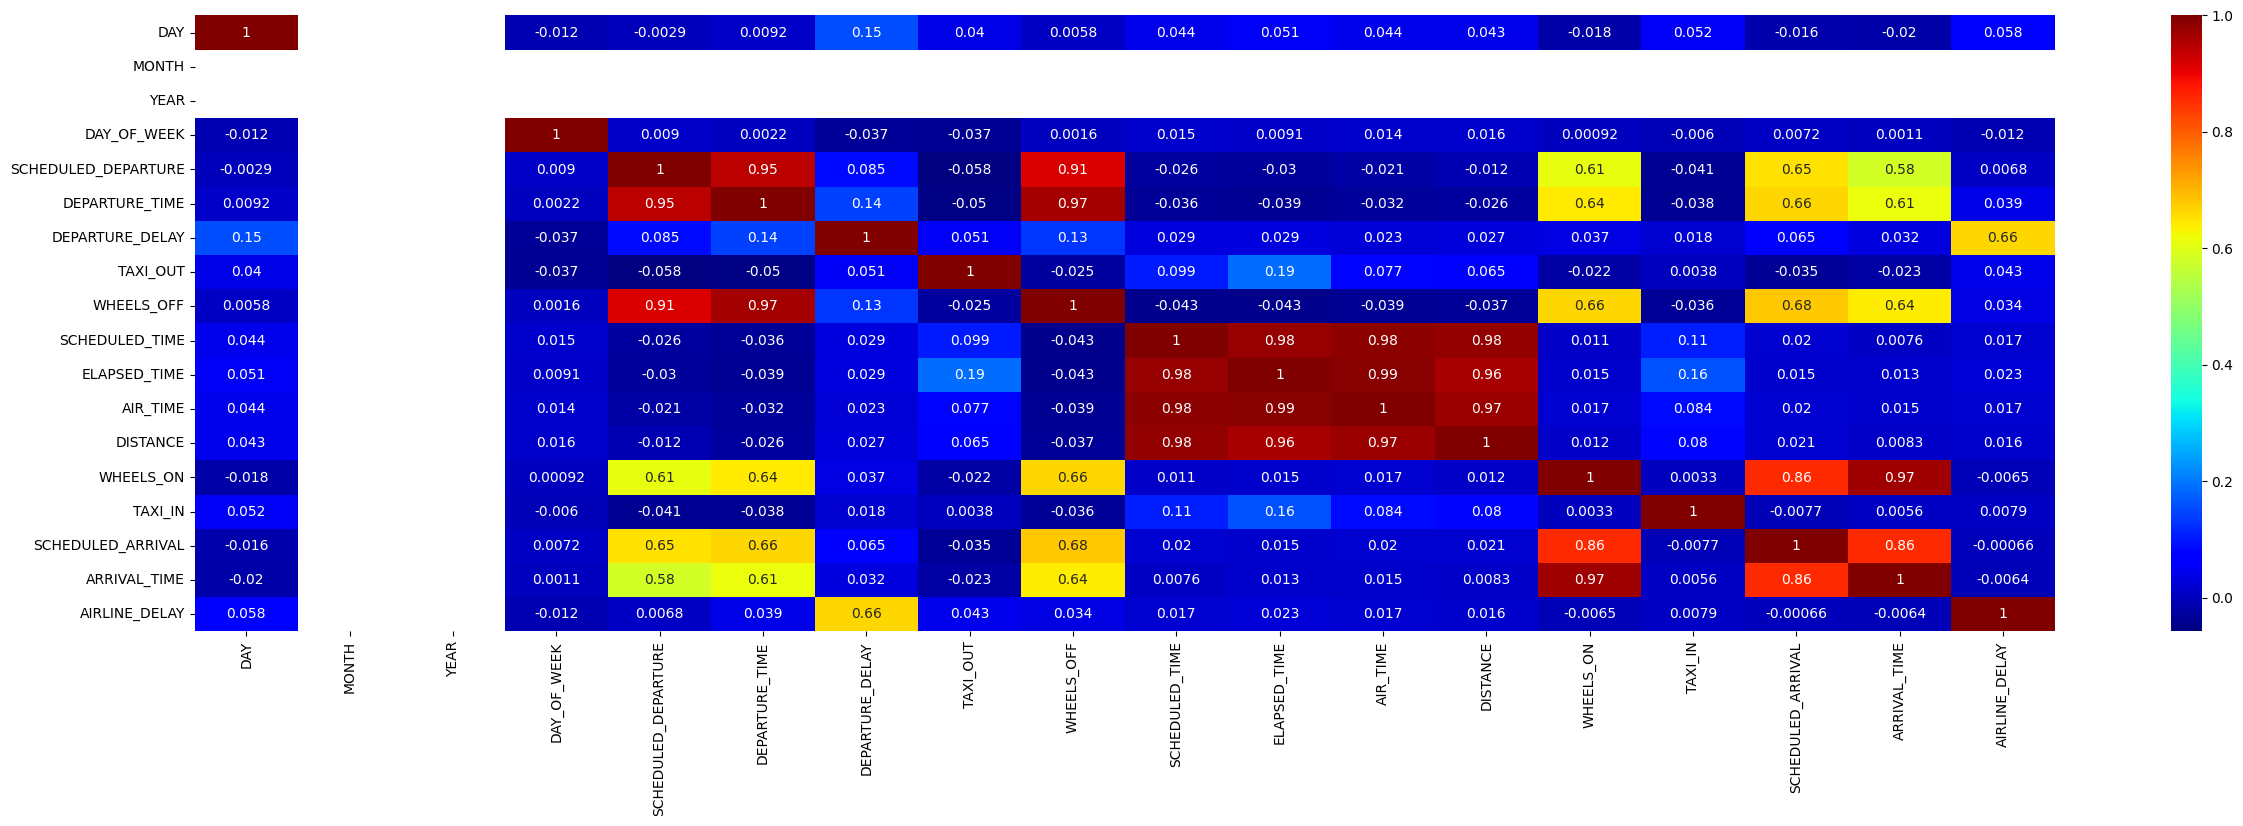

In [31]:
plt.figure(figsize=(30, 8))
sns.heatmap(df_flights.corr(numeric_only=True), cmap='jet', annot=True)
plt.show()

There is something going on with `MONTH` and `YEAR` features. Let us investigate them more:

In [32]:
df_flights[['MONTH', 'YEAR']].value_counts()

MONTH  YEAR
12     2015    50000
dtype: int64

All the rows have the same value for these two features, so we can safely remove this columns from our dataset.

In [33]:
df_flights = df_flights.drop(columns=['MONTH', 'YEAR'])
df_flights.head()

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIRLINE_DELAY
5392343,4,5,WN,LGA,ATL,950,954.0,4.0,18.0,1012.0,170.0,145.0,119.0,762,1211.0,8.0,1240,1219.0,0.0
5569155,15,2,AA,CLT,BOS,2020,2013.0,-7.0,19.0,2032.0,125.0,118.0,95.0,728,2207.0,4.0,2225,2211.0,0.0
5397710,4,5,UA,IAD,LAX,1514,1507.0,-7.0,11.0,1518.0,353.0,323.0,305.0,2288,1723.0,7.0,1807,1730.0,0.0
5448631,8,2,AA,LAX,AUS,635,628.0,-7.0,15.0,643.0,178.0,167.0,148.0,1242,1111.0,4.0,1133,1115.0,0.0
5548657,14,1,WN,FLL,PIT,1515,1524.0,9.0,14.0,1538.0,160.0,143.0,123.0,994,1741.0,6.0,1755,1747.0,0.0


Let us make sure that there is not duplicated rows in the data just in case.

In [34]:
print("Number of duplicated rows:", df_flights.duplicated().sum())

Number of duplicated rows: 0


In [35]:
df_flights.describe(include="object")

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
count,50000,50000,50000
unique,13,307,306
top,WN,ATL,ATL
freq,11208,3248,3199


There are totally four categorical features in the dataset:
1. `AIRLINE` with 13 unique values
2. `ORIGIN_AIRPORT` with 307 unique values
3. `DESTINATION_AIRPORT` with 306 unique values
4. `DAY_OF_WEEK` with 7 unique values.

We assign a number to each value for the first three ones. For the last feature, we will use one hot encoding. A quick note is that we could consider the `DAY` feature as categorical features as well but we keep them as numerical feature in what follows.

Let us get to know the target variable histogram.

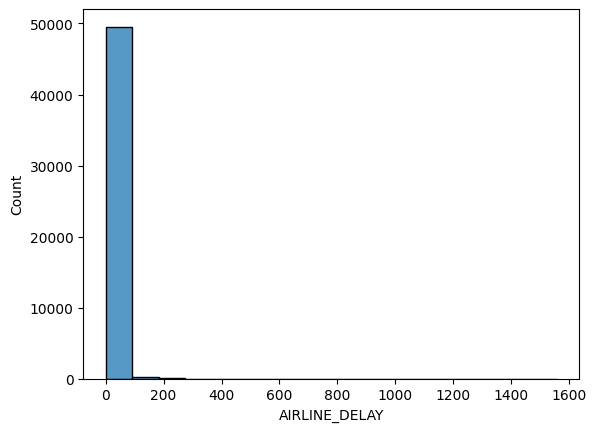

In [36]:
sns.histplot(df_flights["AIRLINE_DELAY"])
plt.show()

As we can see a huge amount of prbablity density is allocated around zero, however, let us take a look at non zero values for `AIRLINE_DELAY`.

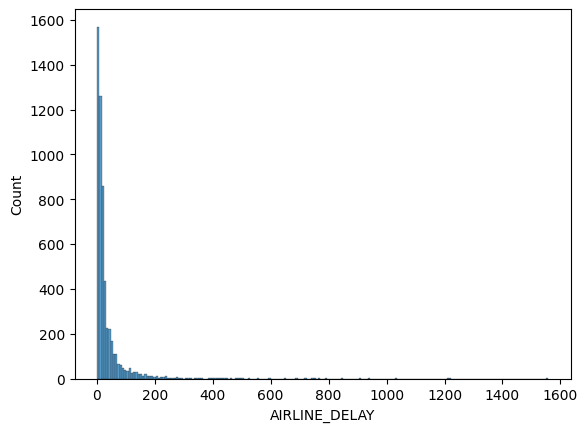

In [37]:
sns.histplot(df_flights[df_flights["AIRLINE_DELAY"] != 0]["AIRLINE_DELAY"], bins=200)
plt.show()

In [38]:
print("Mean={}\nStandard Deviation={}".format(
    np.mean(df_flights["AIRLINE_DELAY"]),
    np.std(df_flights["AIRLINE_DELAY"]))
)

Mean=3.92168
Standard Deviation=26.119989777517144


A major part of data in this case in this case is close to zero with a mean of 3.92168. The distribution of data is highly skewed to right side. General appearance of the distribution is similar to exponential distribution. In next section we will preprocess the dataset and get ready for fitting a model to it.

## Features Encoding

In [39]:
df = df_flights.copy()

y = df.pop("AIRLINE_DELAY")
X = df

print("X.shape={}\ny.shape={}".format(X.shape, y.shape))

X.shape=(50000, 18)
y.shape=(50000,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test={}".format(
    X_train.shape,
    y_train.shape,
    X_test.shape,
    y_test.shape,
))

X_train.shape=(40000, 18)
y_train.shape=(40000,)
X_test.shape=(10000, 18)
y_test=(10000,)


In [41]:
ohe_cols = ['DAY_OF_WEEK']

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(X_train[ohe_cols])

day_of_week_cols = one_hot_encoder.get_feature_names_out()

X_train[day_of_week_cols] = one_hot_encoder.transform(X_train[ohe_cols])
X_test[day_of_week_cols] = one_hot_encoder.transform(X_test[ohe_cols])

X_train[day_of_week_cols].head()

,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
5385848,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5796791,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5400636,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5640656,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5688878,0.0,0.0,1.0,0.0,0.0,0.0,0.0


As we can see above the feature `DAY_OF_WEEK` now becomes seven columns in one hot format, we just need to drop the old column and go after the other categorical columns.

In [42]:
X_train.drop(columns=ohe_cols, inplace=True)
X_test.drop(columns=ohe_cols, inplace=True)

X_test.head()

,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
5666157,21,OO,DEN,MFR,2205,2255.0,50.0,19.0,2314.0,174.0,...,6.0,2359,113.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5588417,17,B6,JFK,CHS,704,722.0,18.0,24.0,746.0,137.0,...,4.0,921,929.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5611631,18,HA,HNL,SFO,1350,1356.0,6.0,15.0,1411.0,310.0,...,27.0,2100,2124.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5523790,13,WN,LAS,DEN,555,555.0,0.0,11.0,606.0,110.0,...,7.0,845,836.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5386692,3,EV,ATL,MGM,2046,2041.0,-5.0,13.0,2054.0,52.0,...,3.0,2038,2025.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
cat_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

print(X[cat_cols[0]].value_counts(), "\n")
print(X[cat_cols[1]].value_counts(), "\n")
print(X[cat_cols[2]].value_counts())

WN    11208
AA     8008
DL     7501
OO     4997
UA     4532
EV     4484
B6     2386
MQ     2166
AS     1522
NK     1106
F9      861
HA      703
VX      526
Name: AIRLINE, dtype: int64 

ATL    3248
ORD    2601
DFW    2160
DEN    1876
LAX    1786
       ... 
ADK       1
OTH       1
BGR       1
GRI       1
MMH       1
Name: ORIGIN_AIRPORT, Length: 307, dtype: int64 

ATL    3199
ORD    2642
DFW    2163
DEN    1911
LAX    1776
       ... 
ERI       2
PBG       2
PPG       1
BGR       1
UST       1
Name: DESTINATION_AIRPORT, Length: 306, dtype: int64


In [44]:
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

In [45]:
X_train.head()

,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
5385848,3,5.0,72.0,163.0,1945,1942.0,-3.0,14.0,1956.0,265.0,...,6.0,2110,2035.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5796791,30,12.0,61.0,75.0,1220,1253.0,33.0,22.0,1315.0,175.0,...,4.0,1415,1443.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5400636,4,9.0,223.0,215.0,1810,1804.0,-6.0,14.0,1818.0,133.0,...,5.0,2023,2004.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5640656,20,0.0,215.0,106.0,1150,1155.0,5.0,9.0,1204.0,185.0,...,6.0,1555,1543.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5688878,23,4.0,37.0,80.0,1110,1150.0,40.0,8.0,1158.0,82.0,...,8.0,1232,1258.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
X_train.select_dtypes(exclude="number").columns

Index([], dtype='object')

As we can see, there are no non-numerical columns anymore, so in the next part we will build a linear regression model.

## Building Models
First, we write a function to do all the operation we have done so far to run the experiment for different train and test sets.

In [47]:
def get_new_train_test(X, y, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # One hot encoding
    ohe_cols = ['DAY_OF_WEEK']
    if ohe_cols in X_train.columns.to_list():
        one_hot_encoder = OneHotEncoder(sparse_output=False)
        one_hot_encoder.fit(X_train[ohe_cols])

        day_of_week_cols = one_hot_encoder.get_feature_names_out()

        X_train[day_of_week_cols] = one_hot_encoder.transform(X_train[ohe_cols])
        X_test[day_of_week_cols] = one_hot_encoder.transform(X_test[ohe_cols])

        X_train.drop(columns=ohe_cols, inplace=True)
        X_test.drop(columns=ohe_cols, inplace=True)

    # Categorical encoding
    cat_cols = []
    if 'AIRLINE' in X_train.columns.to_list():
        cat_cols.append('AIRLINE')

    if 'ORIGIN_AIRPORT' in X_train.columns.to_list():
        cat_cols.append('ORIGIN_AIRPORT')

    if 'DESTINATION_AIRPORT' in X_train.columns.to_list():
        cat_cols.append('DESTINATION_AIRPORT')

    if cat_cols:
        encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

        X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
        X_test[cat_cols] = encoder.transform(X_test[cat_cols])

    return  X_train, X_test, y_train, y_test

In [48]:
np.random.seed(42)
n_experiments = 50

random_seeds = np.random.randint(100, size=n_experiments)
train_mse_values = []
test_mse_values = []

for seed in random_seeds:
    X_train, X_test, y_train, y_test = get_new_train_test(X, y, random_state=seed)
    model = LinearRegression()

    model.fit(X_train, y_train)

    train_mse_values.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse_values.append(mean_squared_error(y_test, model.predict(X_test)))

print("For experiment #1:\nTrain MSE={}\tTest MSE={}".format(
    train_mse_values[0], test_mse_values[0])
)

For experiment #1:
Train MSE=374.2756641679385	Test MSE=389.3564934354752


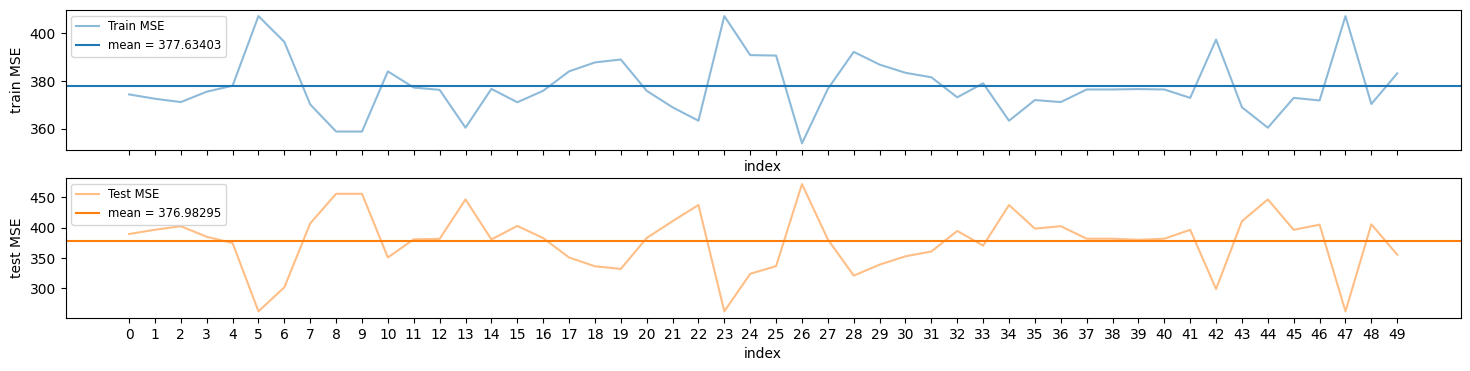

In [49]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(18, 4))
axes[0].plot(range(n_experiments), train_mse_values, c="C0", label="Train MSE", alpha=0.5)
axes[0].axhline(np.mean(train_mse_values), color='C0',
                label='mean = {:.5f}'.format(np.mean(train_mse_values)))
axes[0].legend(fontsize="small")
axes[0].set_xlabel("index")
axes[0].set_xticks(range(n_experiments))
axes[0].set_ylabel("train MSE")


axes[1].plot(range(n_experiments), test_mse_values, c="C1", label="Test MSE", alpha=0.5)
axes[1].axhline(np.mean(test_mse_values), color='C1',
                label='mean = {:.5f}'.format(np.mean(test_mse_values)))
axes[1].legend(fontsize="small")
axes[1].set_xlabel("index")
axes[1].set_xticks(range(n_experiments))
axes[1].set_ylabel("test MSE")

plt.show()

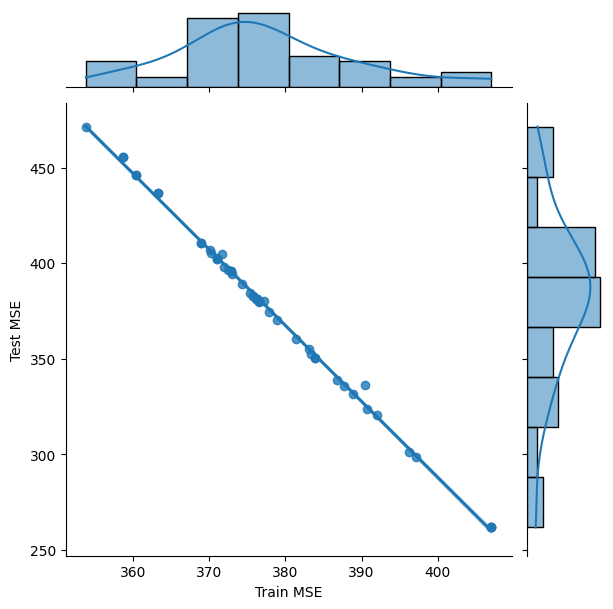

In [50]:
sns.jointplot(x=train_mse_values, y=test_mse_values, kind='reg')

plt.xlabel("Train MSE")
plt.ylabel("Test MSE")

plt.show()

The train MSE and Test MSE are negatively correlated which is a surprsing fact.
There are some potential reason for this coincidence:
1. The model is not complex enough and it is underfitting both the training and test data and due to the concentration on value 0 on target variable, in some cases the test MSE are better by chance.
2. The outliers are numerous in this dataset, so they happen to affect the MSE value in such a way that the train and test MSE's become correlated. In the following cell we redo the same experiment for `MAE` metric this time.

For experiment #1:
Train MAE=6.784240061667141	Test MAE=6.847386474431301


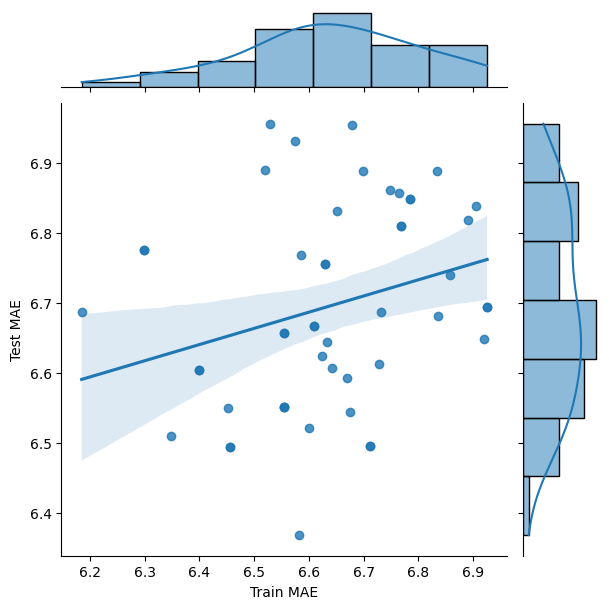

In [51]:
from sklearn.metrics import mean_absolute_error


n_experiments = 50

random_seeds = np.random.randint(100, size=n_experiments)
train_mae_values = []
test_mae_values = []

for seed in random_seeds:
    X_train, X_test, y_train, y_test = get_new_train_test(X, y, random_state=seed)
    m = LinearRegression()

    m.fit(X_train, y_train)

    train_mae_values.append(mean_absolute_error(m.predict(X_train), y_train))
    test_mae_values.append(mean_absolute_error(m.predict(X_test), y_test))

print("For experiment #1:\nTrain MAE={}\tTest MAE={}".format(
    train_mae_values[0], test_mae_values[0])
)


sns.jointplot(x=train_mae_values, y=test_mae_values, kind='reg')

plt.xlabel("Train MAE")
plt.ylabel("Test MAE")

plt.show()

As we can see there is no significance correlation when we use MAE. For more investigation of the surprising negative correlation between train MSE and test MSE, let us go into more details in one of the cases where train MSE is high and test MSE is low:

In [52]:
seed = random_seeds[np.argmax(test_mse_values)]

X_train, X_test, y_train, y_test = get_new_train_test(X, y, random_state=seed)
model = LinearRegression()

model.fit(X_train, y_train)

train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
print(train_mse, test_mse)

383.2347661340544 353.6928739267205


Mean=-7.014477887423709e-15	Var=383.2347661340544


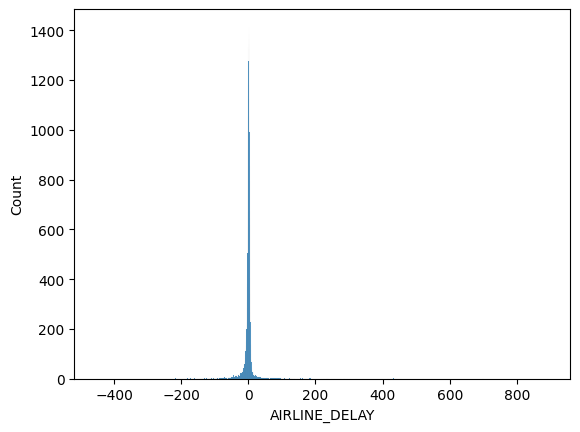

In [53]:
residuals_train = y_train - model.predict(X_train)
print("Mean={}\tVar={}".format(np.mean(residuals_train), np.std(residuals_train)**2))
sns.histplot(residuals_train)
plt.show()

Mean=0.03780310653699353	Var=353.69144485185666


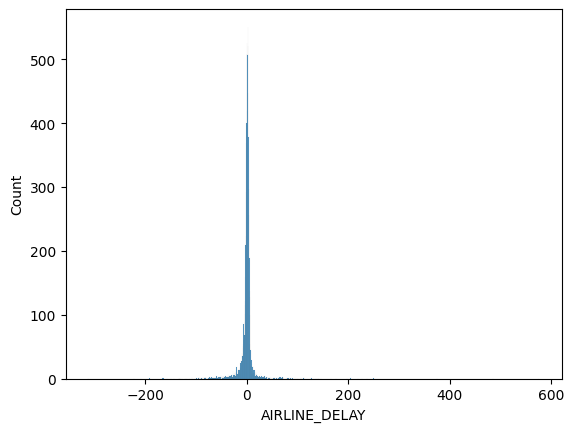

In [54]:
residuals_test = y_test - model.predict(X_test)
print("Mean={}\tVar={}".format(np.mean(residuals_test), np.std(residuals_test)**2))
sns.histplot(residuals_test)
plt.show()

Text(0.5, 0, 'Model Prediction')

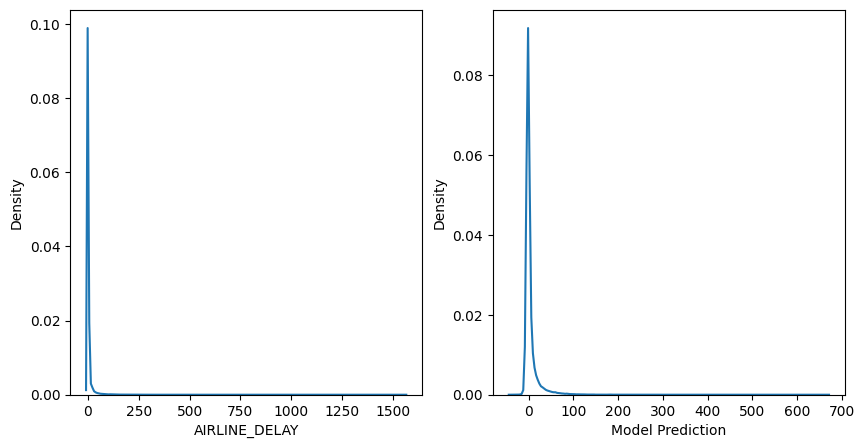

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(y_train, ax=axes[0])
sns.kdeplot(model.predict(X_train), ax=axes[1])

axes[1].set_xlabel("Model Prediction")

Text(0.5, 0, 'Model Prediction')

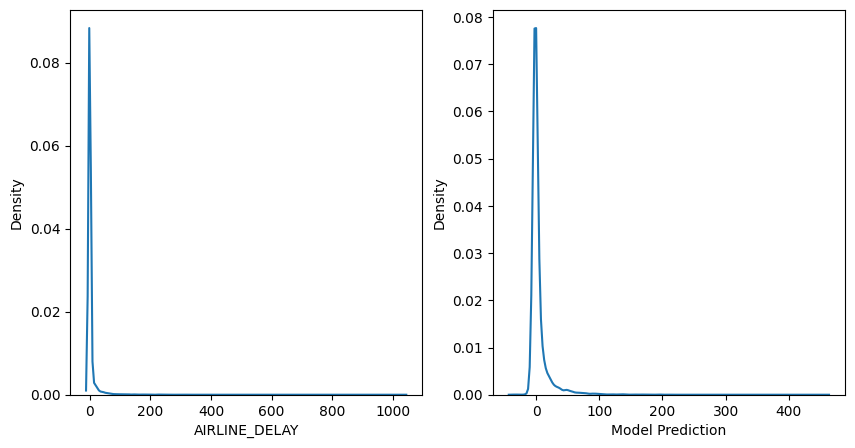

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(y_test, ax=axes[0])
sns.kdeplot(model.predict(X_test), ax=axes[1])

axes[1].set_xlabel("Model Prediction")

There is not any significance difference between `X_train`, and `X_test`, however, the differnce between MSE and MAE are significant. One of the main important aspects of that MSE and MAE are different is the way that they handle outliers. Therefore we can assume that the problem is related to the outliers and with removing them, the situation could get better.

## Best Subset Selection

For this part the two following function in forward and backward manner, do the best subset selection.

In [57]:
def forward_best_subset_selection(X, y, k, score_func):
    n_features = X.shape[1]
    selected_features = []
    remaining_features = list(range(n_features))
    best_subset = None
    best_score = -float('inf')

    for i in range(k):
        feature_scores = {}

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X.iloc[:, current_features]
            X_train, X_test, y_train, y_test = get_new_train_test(X_subset, y, random_state=42)

            model = LinearRegression()
            model.fit(X_train, y_train)

            score = -score_func(y_test, model.predict(X_test))
            feature_scores[feature] = score

        best_feature = max(feature_scores, key=feature_scores.get)
        current_feature_score = feature_scores[best_feature]

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

        if current_feature_score > best_score:
            best_subset = selected_features[:]
            best_score = current_feature_score

    return X.columns[best_subset]

In [58]:
k = 10
selected_features = forward_best_subset_selection(X, y, k, mean_squared_error)

selected_features

Index(['DEPARTURE_DELAY', 'SCHEDULED_DEPARTURE', 'DAY', 'AIRLINE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DAY_OF_WEEK', 'TAXI_IN',
       'WHEELS_ON', 'TAXI_OUT'],
      dtype='object')

In [59]:
X_train, X_test, y_train, y_test = get_new_train_test(X[selected_features], y, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
print("Train MSE=",mean_squared_error(y_train, model.predict(X_train)))
print("Test MSE=",mean_squared_error(y_test, model.predict(X_test)))

Train MSE= 376.41532602613916
Test MSE= 384.93667116530173


In [60]:
def backward_best_subset_selection(X, y, k, score_func):
    n_features = X.shape[1]
    selected_features = list(range(n_features))
    best_subset = None
    best_score = -float('inf')

    for i in range(n_features - k):
        feature_scores = {}

        for feature in selected_features:
            current_features = [f for f in selected_features if f != feature]
            X_subset = X.iloc[:, current_features]
            X_train, X_test, y_train, y_test = get_new_train_test(X_subset, y, random_state=42)

            model = LinearRegression()
            model.fit(X_train, y_train)

            score = -score_func(y_test, model.predict(X_test))
            feature_scores[feature] = score

        worst_feature = max(feature_scores, key=feature_scores.get)
        current_feature_score = feature_scores[worst_feature]

        selected_features.remove(worst_feature)

        best_subset = selected_features[:k]

    return X.columns[best_subset]

In [61]:
k = 10
selected_features = backward_best_subset_selection(X, y, k, mean_squared_error)

selected_features

Index(['DAY', 'DAY_OF_WEEK', 'AIRLINE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME'],
      dtype='object')

In [62]:
X_train, X_test, y_train, y_test = get_new_train_test(X[selected_features], y, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
print("Train MSE=",mean_squared_error(y_train, model.predict(X_train)))
print("Test MSE=",mean_squared_error(y_test, model.predict(X_test)))

Train MSE= 375.4767785647032
Test MSE= 384.7081811883824


As we can see, the MSE values for these two models are slightly better than the expected value of MSE's on the model that use all feauture. There is not a big difference because generally the

## Ridge Regression

In [63]:
X_train, X_test, y_train, y_test = get_new_train_test(X, y, random_state=42)
alpha_list = np.logspace(-5, 6, 20)
ridge_mse_errors = []

for alpha in alpha_list:
    model = Ridge(alpha=alpha)


    model.fit(X_train, y_train)

    ridge_mse_errors.append(mean_squared_error(y_test, model.predict(X_test)))

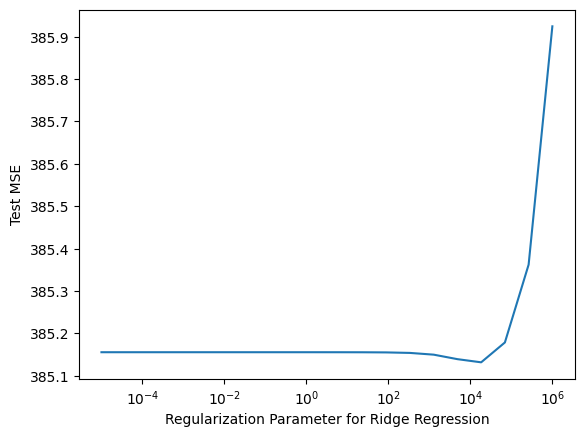

In [64]:
plt.plot(alpha_list, ridge_mse_errors)

plt.xlabel("Regularization Parameter for Ridge Regression")
plt.ylabel("Test MSE")
plt.xscale('log')
plt.show()

The low values for regularization parameter do not have any significant effect on the model because the penalty term they add to the loss function is not considerable. As this parameters increase, the penalty term increase as well, so in about $10^4$ the error becomes minimum and after that, the penalty is so large that the model underfit the train data and the error on the test set becomes vastly large.

## Lasso Regression

In [65]:
X_train, X_test, y_train, y_test = get_new_train_test(X, y, random_state=42)
alpha_list = np.logspace(-2, 5, 20)
lasso_mse_errors = []
non_zero_coefs = []

for alpha in alpha_list:
    model = Lasso(alpha=alpha, max_iter = 5000)


    model.fit(X_train, y_train)

    lasso_mse_errors.append(mean_squared_error(y_test, model.predict(X_test)))

    non_zero_coefs.append((model.coef_ != 0).sum())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.839e+06, tolerance: 2.706e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+06, tolerance: 2.706e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.967e+05, tolerance: 2.706e

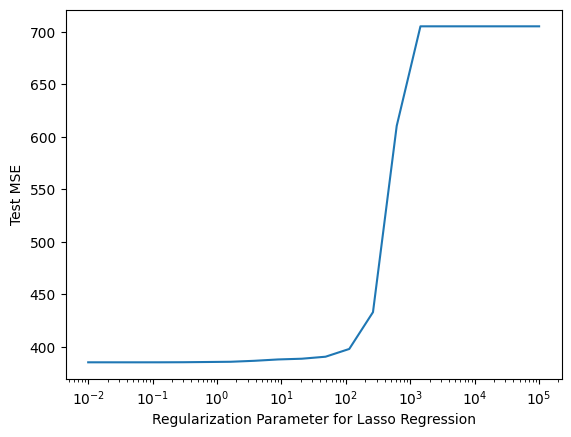

In [66]:
plt.plot(alpha_list, lasso_mse_errors)

plt.xlabel("Regularization Parameter for Lasso Regression")
plt.ylabel("Test MSE")
plt.xscale('log')
plt.show()

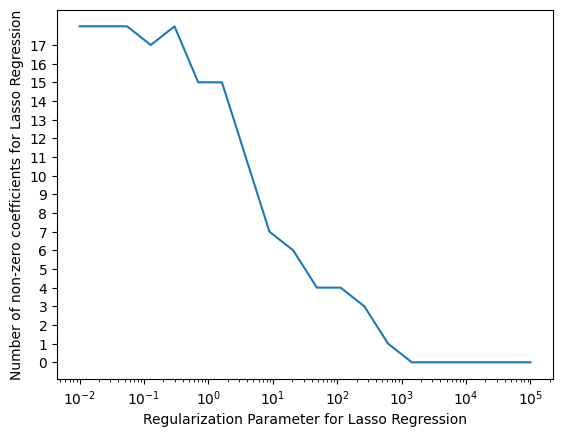

In [67]:
plt.plot(alpha_list, non_zero_coefs)

plt.xlabel("Regularization Parameter for Lasso Regression")
plt.ylabel("Number of non-zero coefficients for Lasso Regression")
plt.xscale('log')
plt.yticks(range(max(non_zero_coefs)))
plt.show()

We know that Lasso adds L1 penalty to the objective function so this could act as a feature selector. In figures, it is shown that when the parameter of regularization in lasso goes high, the number of non-zero coefficients gets closer to zero, and also the MSE value goes high. Therefore, if we surely want to select some features the plot could help us to choose a good value for regularization parameter. In this case, however, all features are helpful because with increasing the paramter, the error constantly increases.